# Initiate data

### Load the data of the different cities:

In [261]:
# Common libraries imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
Athens = pd.read_csv('CityData/listingsAthens.csv')
Athens.insert(0,'City','Athens')
print(Athens.shape)
Athens['price']

(13182, 76)


0         $20.00
1        $293.00
2         $60.00
3         $93.00
4        $119.00
          ...   
13177    $151.00
13178     $54.00
13179    $214.00
13180     $60.00
13181     $72.00
Name: price, Length: 13182, dtype: object

In [263]:
Lisbon = pd.read_csv('CityData/listingsLisbon.csv')
Lisbon.insert(0,'City','Lisbon')
print(Lisbon.shape)
Lisbon['price']

(22751, 76)


0         $68.00
1        $199.00
2         $71.00
3        $105.00
4         $60.00
          ...   
22746     $76.00
22747    $122.00
22748     $78.00
22749     $63.00
22750     $69.00
Name: price, Length: 22751, dtype: object

In [264]:
London = pd.read_csv('CityData/listingsLondon.csv')
London.insert(0,'City','London')
print(London.shape)
London['price']

(91778, 76)


0         $67.00
1        $140.00
2         $65.00
3        $297.00
4        $149.00
          ...   
91773    $500.00
91774    $289.00
91775    $400.00
91776     $60.00
91777     $92.00
Name: price, Length: 91778, dtype: object

In [265]:
Berlin = pd.read_csv('CityData/listingsBerlin.csv')
Berlin.insert(0,'City','Berlin')
print(Berlin.shape)
Berlin['price']

(13327, 76)


0         $83.00
1        $180.00
2        $116.00
3         $70.00
4        $100.00
          ...   
13322     $47.00
13323     $87.00
13324     $58.00
13325    $161.00
13326     $94.00
Name: price, Length: 13327, dtype: object

### Merge the city data into one dataframe:

In [266]:
merged = pd.concat([Athens, Lisbon, London, Berlin],ignore_index=True)
merged

,City,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Athens,40042598,https://www.airbnb.com/rooms/40042598,20231225075512,2023-12-26,previous scrape,Rental unit in Athina · 1 bedroom · 1 bed · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/fb6d0257-52ec...,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,Athens,39069205,https://www.airbnb.com/rooms/39069205,20231225075512,2023-12-26,previous scrape,Rental unit in Athina · 2 bedrooms · 2 beds · ...,NaN,Is located in one of the hottest spots in Kolo...,https://a0.muscache.com/pictures/8965800b-9101...,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,Athens,653274914834812593,https://www.airbnb.com/rooms/653274914834812593,20231225075512,2023-12-26,city scrape,Condo in Athina · ★5.0 · 1 bedroom · 2 beds · ...,NaN,Η γειτονιά βρίσκεται μια ανάσα από τον Παρθενώ...,https://a0.muscache.com/pictures/b8926124-f861...,...,5.0,4.98,4.96,00001652202,t,1,1,0,0,2.68
3,Athens,54361219,https://www.airbnb.com/rooms/54361219,20231225075512,2023-12-26,city scrape,Rental unit in Athina · ★4.75 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,5.0,4.98,4.83,00001402443,t,1,1,0,0,1.83
4,Athens,51258073,https://www.airbnb.com/rooms/51258073,20231225075512,2023-12-26,city scrape,Rental unit in Athina · ★5.0 · Studio · 3 beds...,NaN,NaN,https://a0.muscache.com/pictures/2e0592af-8983...,...,5.0,5.00,5.00,00002160731,f,3,3,0,0,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141033,Berlin,1048290130755102956,https://www.airbnb.com/rooms/1048290130755102956,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,...,NaN,NaN,NaN,First name and Last name: Rounak Kakwani <br/>...,f,1,1,0,0,NaN
141034,Berlin,1048444986736672883,https://www.airbnb.com/rooms/1048444986736672883,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,NaN,"Alexanderplatz, Prenzlauer Berg, Boxhagener Pl...",https://a0.muscache.com/pictures/hosting/Hosti...,...,NaN,NaN,NaN,First name and Last name: Esra Kocatürk <br/> ...,f,1,1,0,0,NaN
141035,Berlin,1048535169043506669,https://www.airbnb.com/rooms/1048535169043506669,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,...,NaN,NaN,NaN,First name and Last name: Pietro manfregola <b...,f,1,1,0,0,NaN
141036,Berlin,1048637262243761764,https://www.airbnb.com/rooms/1048637262243761764,20231218233220,2023-12-19,city scrape,Rental unit in Berlin · ★New · 3 bedrooms · 3 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,NaN,NaN,NaN,Legal entity name and Legal form: Spacifik UG ...,f,3,1,2,0,NaN


# Data cleaning

### Removing columns that are not useful:

In [267]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141038 entries, 0 to 141037
Data columns (total 76 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   City                                          141038 non-null  object 
 1   id                                            141038 non-null  int64  
 2   listing_url                                   141038 non-null  object 
 3   scrape_id                                     141038 non-null  int64  
 4   last_scraped                                  141038 non-null  object 
 5   source                                        141038 non-null  object 
 6   name                                          141038 non-null  object 
 7   description                                   0 non-null       float64
 8   neighborhood_overview                         77382 non-null   object 
 9   picture_url                                   14

In [268]:
# Drop all columns including 'host', except for 'host_is_superhost' and 'host_identity_verified'
host_columns = list(merged.filter(regex='host'))
host_columns.remove('host_is_superhost')
host_columns.remove('host_identity_verified')
merged.drop(host_columns,axis=1,inplace=True)

In [269]:
# Drop uninformative features:
merged.drop(columns = ['id',
                       'listing_url',
                       'scrape_id',
                       'last_scraped',
                       'source',
                       'name',
                       'description',
                       'neighborhood_overview',
                       'picture_url',
                       'bathrooms',
                       'calendar_updated',
                       'calendar_last_scraped',
                       'license'],inplace=True)

In [270]:
# Drop redundant min_min_night, min_max_night, max_min_night, max_max_night cols
nigth_columns = list(merged.filter(regex='nights'))
nigth_columns.remove('minimum_nights')
nigth_columns.remove('maximum_nights')
merged.drop(columns = nigth_columns, inplace=True)


For number of reviews we have several different variables.
- number_of_reviews: total number of reviews
- number_of_reviews_ltm: number of reviews in the last twelve months
- number_of_reviews_l30d: number of reviews in the last 30 days

We keep these in the dataset.

We also have variables first_review and last_review, which give the dates of the first and the last review. These can be dropped.

In [271]:
merged.drop(columns = ['first_review','last_review'],inplace=True)

In [272]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141038 entries, 0 to 141037
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   City                          141038 non-null  object 
 1   host_is_superhost             140808 non-null  object 
 2   host_identity_verified        141024 non-null  object 
 3   neighbourhood                 77383 non-null   object 
 4   neighbourhood_cleansed        141038 non-null  object 
 5   neighbourhood_group_cleansed  36078 non-null   object 
 6   latitude                      141038 non-null  float64
 7   longitude                     141038 non-null  float64
 8   property_type                 141038 non-null  object 
 9   room_type                     141038 non-null  object 
 10  accommodates                  141038 non-null  int64  
 11  bathrooms_text                140900 non-null  object 
 12  bedrooms                      25 non-null   

In [273]:
# Null values check:
merged.isnull().sum()

City                                 0
host_is_superhost                  230
host_identity_verified              14
neighbourhood                    63655
neighbourhood_cleansed               0
neighbourhood_group_cleansed    104960
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                     138
bedrooms                        141013
beds                              1703
amenities                            0
price                             9660
minimum_nights                       0
maximum_nights                       0
has_availability                  9660
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
number_of_reviews_ltm                0
number_of_reviews_l30d   

In [274]:
catvars  = merged.select_dtypes(include=['object']).columns
numvars = merged.select_dtypes(include=['int64', 'float64']).columns

print('Categorical features:')
print(catvars)

print('Numerical features:')
print(numvars)

Categorical features:
Index(['City', 'host_is_superhost', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price',
       'has_availability', 'instant_bookable'],
      dtype='object')
Numerical features:
Index(['latitude', 'longitude', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


Note that the following variables can be changed to booleans:
- host_is_superhost
- host_identity_verified
- has_availability
- instant_bookable

In [275]:
merged.replace(['f','t'],[False,True],inplace=True)
merged

,City,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,Athens,False,True,NaN,ΠΕΔΙΟ ΑΡΕΩΣ,NaN,37.994430,23.736880,Private room in rental unit,Private room,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,Athens,False,True,"Athina, Greece",ΚΟΛΩΝΑΚΙ,NaN,37.979190,23.745320,Entire rental unit,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,Athens,True,True,"Athina, Greece",ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,NaN,37.966000,23.727170,Entire condo,Entire home/apt,...,0,5.00,5.00,5.00,4.96,5.0,4.98,4.96,True,2.68
3,Athens,False,True,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,NaN,37.975890,23.732750,Entire rental unit,Entire home/apt,...,0,4.75,4.83,4.78,4.98,5.0,4.98,4.83,True,1.83
4,Athens,False,True,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,NaN,37.979220,23.724700,Entire rental unit,Entire home/apt,...,0,5.00,5.00,5.00,5.00,5.0,5.00,5.00,False,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141033,Berlin,False,True,NaN,Prenzlauer Berg Nordwest,Pankow,52.552905,13.400229,Entire rental unit,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
141034,Berlin,False,True,"Berlin, Germany",Alexanderplatz,Mitte,52.522356,13.426044,Entire rental unit,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
141035,Berlin,False,True,NaN,Volkspark Wilmersdorf,Charlottenburg-Wilm.,52.485782,13.335904,Entire rental unit,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
141036,Berlin,False,True,NaN,Brunnenstr. Nord,Mitte,52.544105,13.373386,Entire rental unit,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [276]:
merged['price']

0          $20.00
1         $293.00
2          $60.00
3          $93.00
4         $119.00
           ...   
141033     $47.00
141034     $87.00
141035     $58.00
141036    $161.00
141037     $94.00
Name: price, Length: 141038, dtype: object

Note that the variable 'price' is stated as an object, but we want this to be numerical.

In [277]:
# Removing dollar signs and commas from the expressions:
merged['price'] = merged['price'].replace({'\$': '', ',': ''}, regex=True)

# Changing price to numerical column
merged['price'] = pd.to_numeric(merged['price'])

# Plotting

In [278]:
merged.describe()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,141038.000000,141038.000000,141038.000000,25.000000,139335.000000,131378.000000,141038.000000,1.410380e+05,141038.000000,141038.000000,...,141038.000000,141038.000000,108932.000000,108900.000000,108911.000000,108867.000000,108898.000000,108863.000000,108862.000000,108848.000000
mean,48.283310,1.915987,3.319687,4.720000,1.945161,162.691615,8.705916,4.388811e+03,10.258824,24.210830,...,8.391923,0.539514,4.674342,4.726946,4.653323,4.784356,4.800695,4.715679,4.603084,1.187028
std,5.745488,8.924051,2.060150,2.458319,1.467095,476.328500,28.521551,1.398021e+06,11.001260,23.585743,...,16.078092,1.290609,0.489387,0.465816,0.513026,0.430352,0.429405,0.411211,0.506787,1.483957
min,37.950322,-9.488100,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,39.137487,-0.218255,2.000000,4.000000,1.000000,60.000000,1.000000,6.000000e+01,0.000000,0.000000,...,0.000000,0.000000,4.570000,4.670000,4.530000,4.750000,4.780000,4.620000,4.500000,0.210000
50%,51.498557,-0.122304,3.000000,4.000000,1.000000,100.000000,2.000000,3.650000e+02,7.000000,20.000000,...,1.000000,0.000000,4.820000,4.870000,4.810000,4.920000,4.950000,4.830000,4.730000,0.670000
75%,51.540959,-0.009405,4.000000,5.000000,2.000000,170.000000,4.000000,1.125000e+03,20.000000,48.000000,...,9.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000,1.630000
max,52.656110,23.780220,16.000000,14.000000,76.000000,80275.000000,1125.000000,5.248556e+08,30.000000,60.000000,...,716.000000,36.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.330000,5.000000,56.730000


There seems to be a very high value for the price somewhere in the dataframe. We will locate the corresponding instance so we can delete it.

<AxesSubplot:xlabel='count', ylabel='City'>

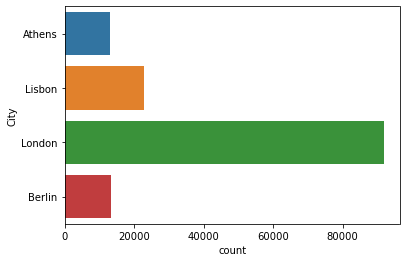

In [279]:
# Plot the number of instances per city
sns.countplot(data=merged, y='City')

Text(0.5, 1.0, 'Mean price of Airbnb listing per European city')

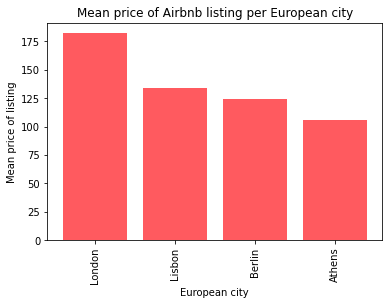

In [280]:
mean_price = merged.groupby('City')['price'].mean().sort_values(ascending=False)
plt.bar(mean_price.index,mean_price,color='#FF5A5F')
plt.xticks(rotation=90)
plt.grid(False)
plt.xlabel('European city')
plt.ylabel('Mean price of listing')
plt.title('Mean price of Airbnb listing per European city')